In [24]:
import pandas as pd
import my_modules as mm
import numpy as np
from scipy.stats import norm
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
hfi = mm.get_hfi_returns()

C:\Users\Administrator\Investment_management\my_modules.py:48: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


In [8]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [10]:
mm.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [14]:
 np.percentile(hfi,5,axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [20]:
def var_historic(r,level=5):
    """
    Get the labelling of pandas dataframe
    """
    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_historic,level=level) #calls it on each collumn

    elif isinstance(r,pd.Series):
        return -np.percentile(r,level)
    else:
        raise TypeError("r must be series or dataframe")
    

In [34]:
mm.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [27]:
z = norm.ppf(.05) #how many sds from the mean is this percentile

In [31]:
-(hfi.mean() + z*hfi.std(ddof=0)) == mm.var_gaussian(hfi)

Convertible Arbitrage     True
CTA Global                True
Distressed Securities     True
Emerging Markets          True
Equity Market Neutral     True
Event Driven              True
Fixed Income Arbitrage    True
Global Macro              True
Long/Short Equity         True
Merger Arbitrage          True
Relative Value            True
Short Selling             True
Funds Of Funds            True
dtype: bool

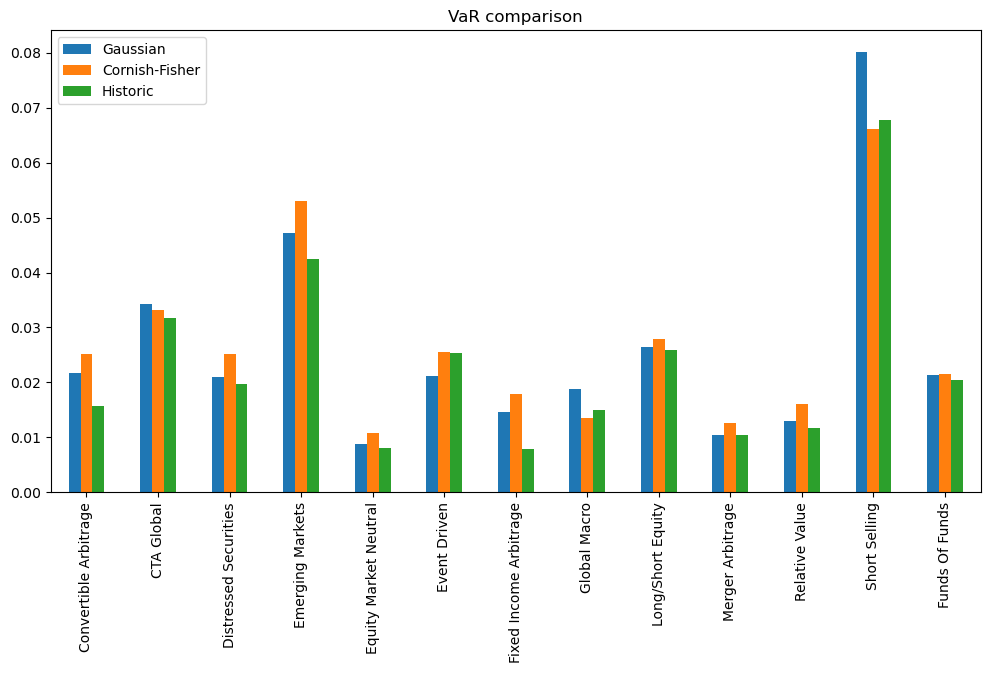

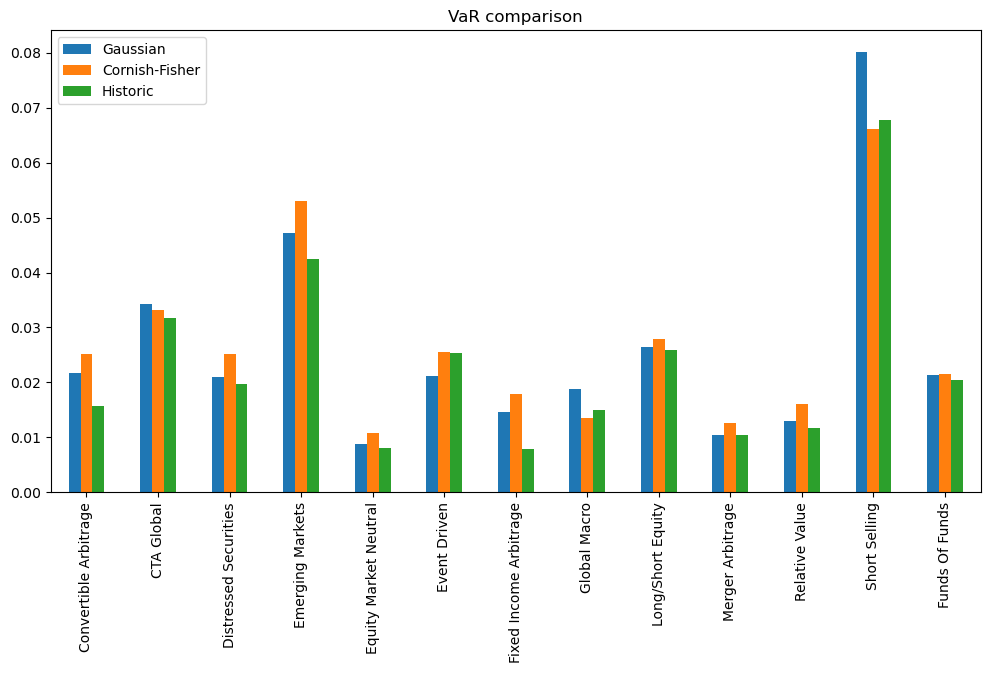

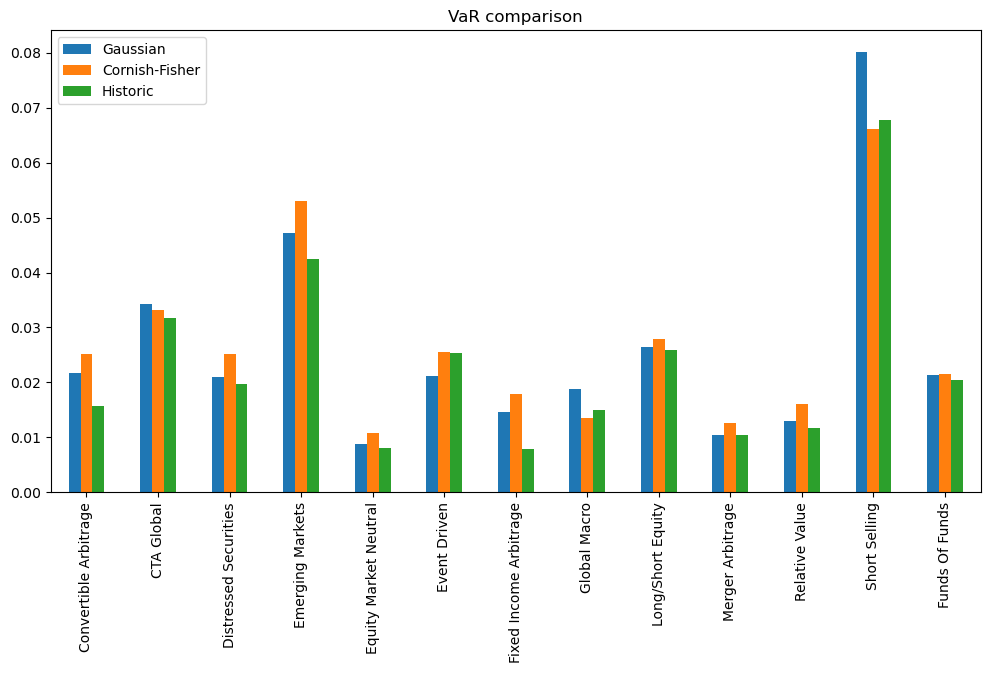

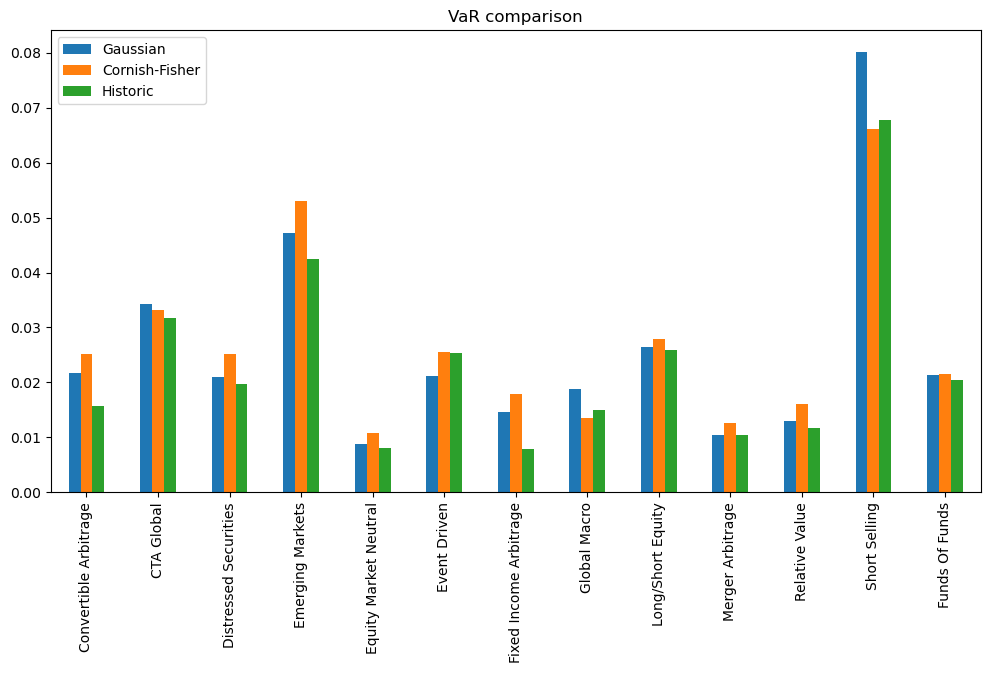

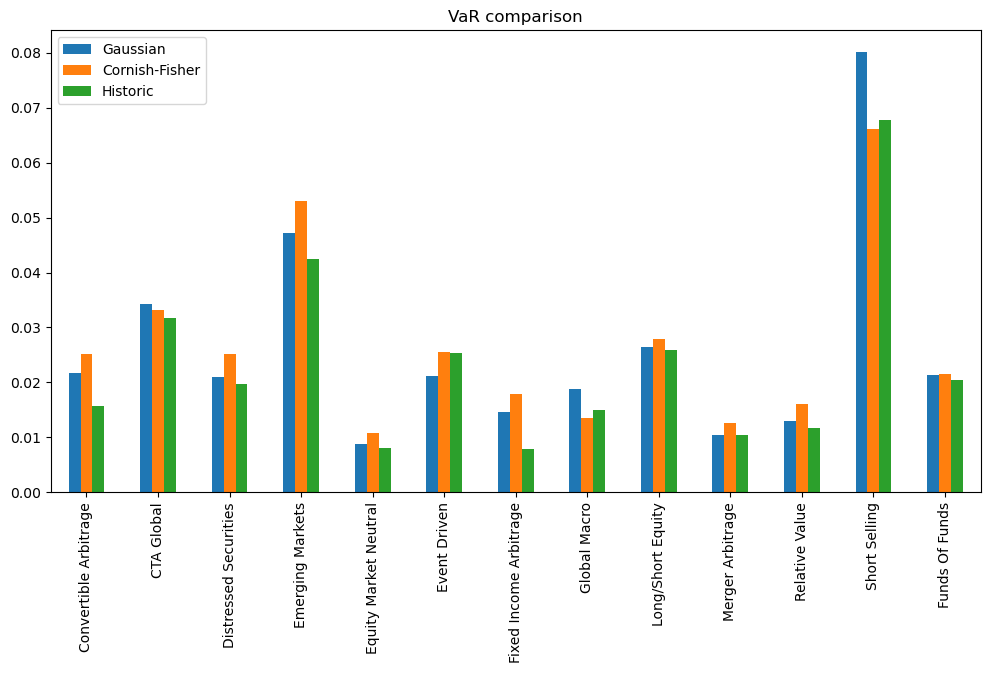

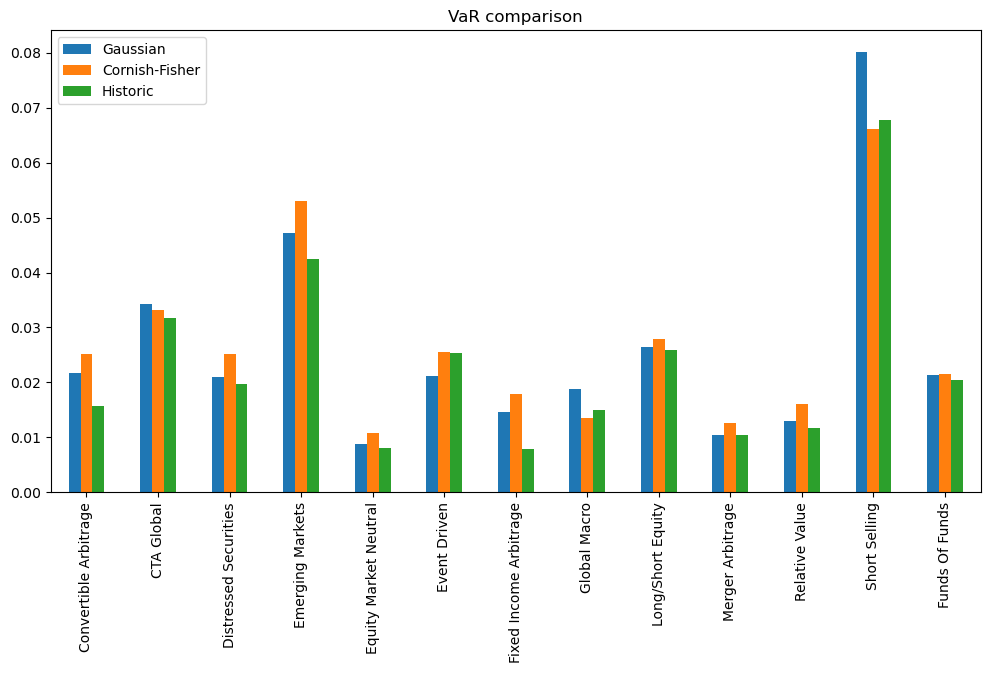

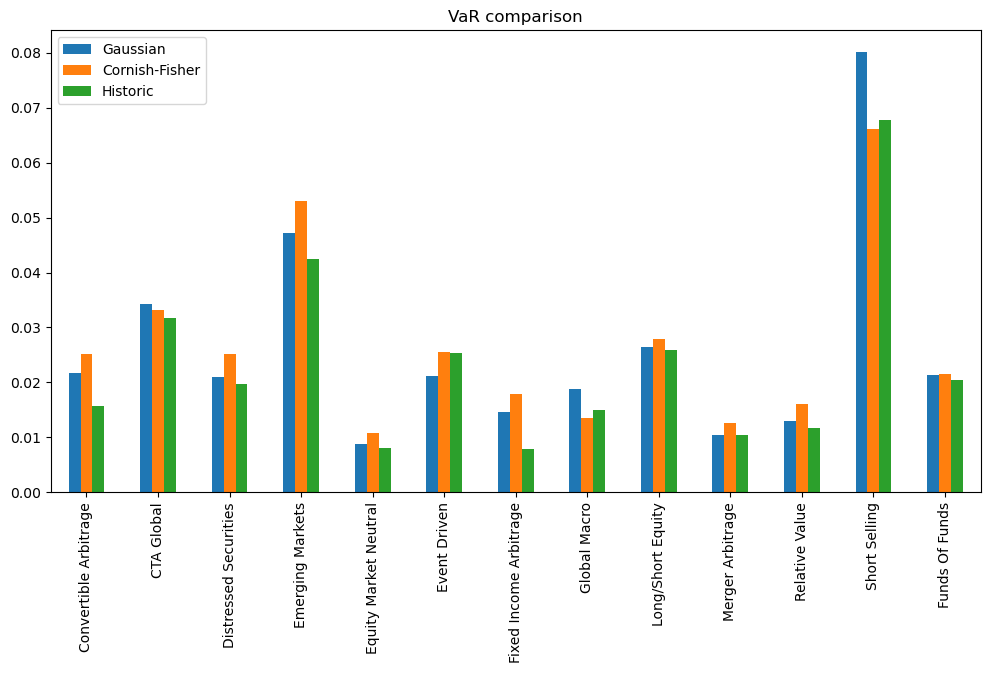

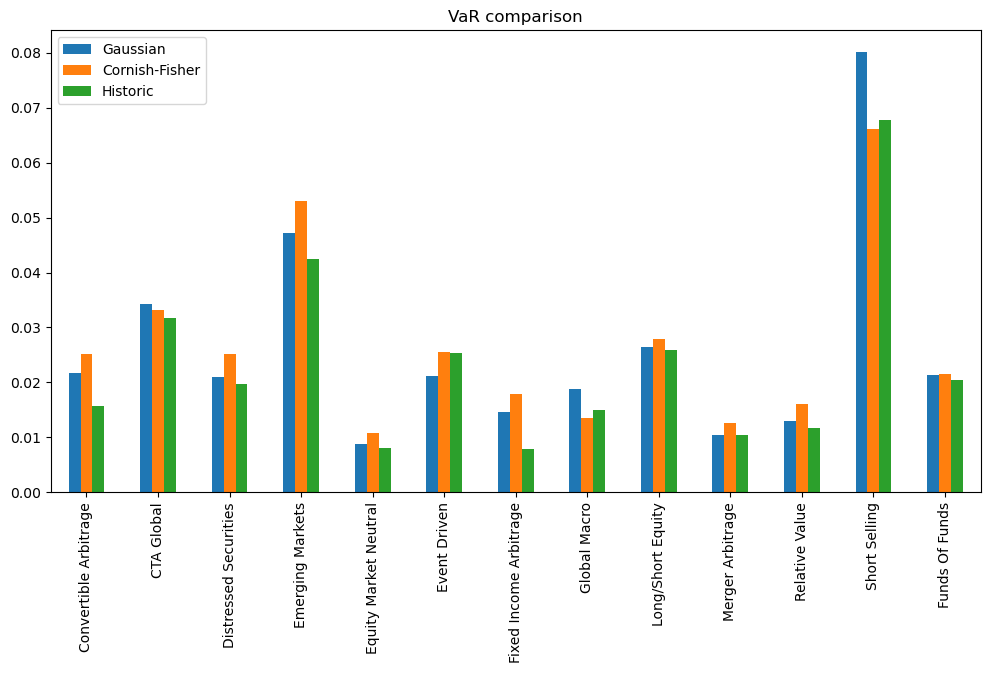

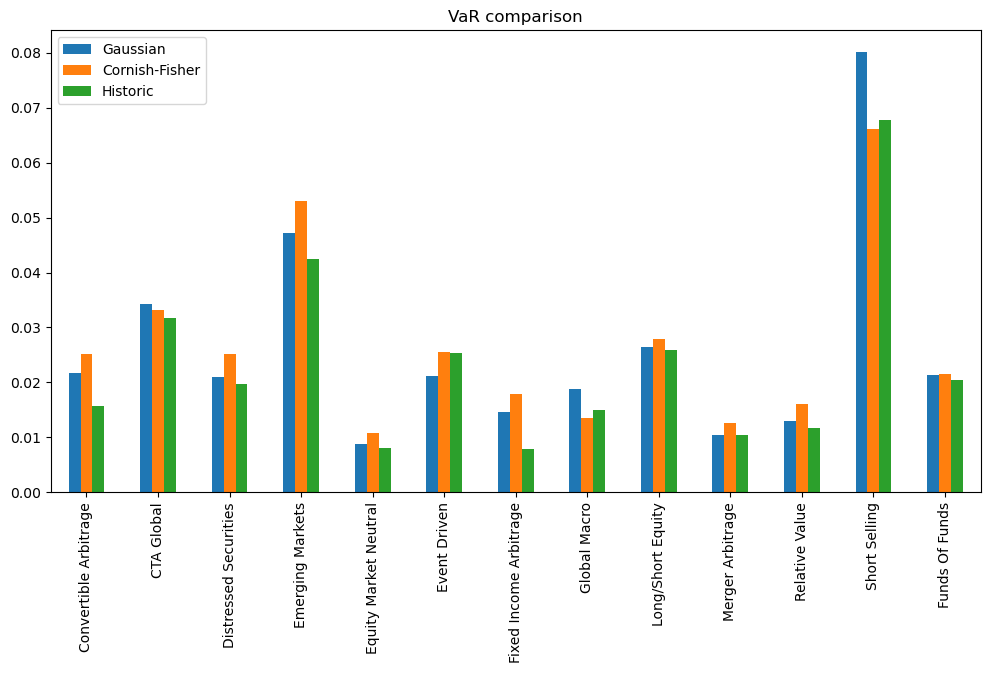

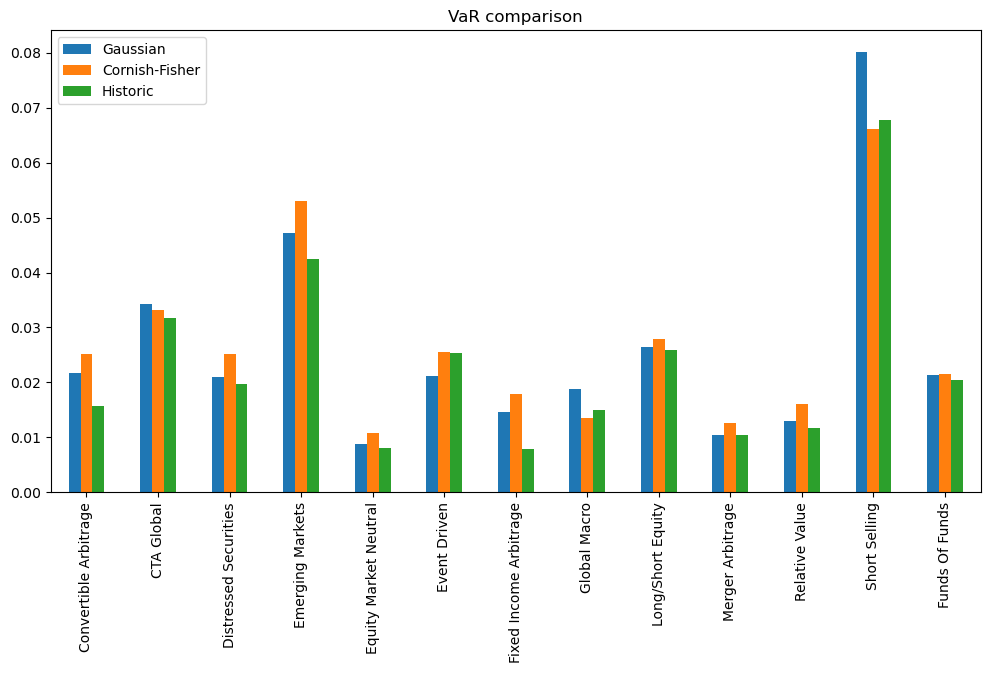

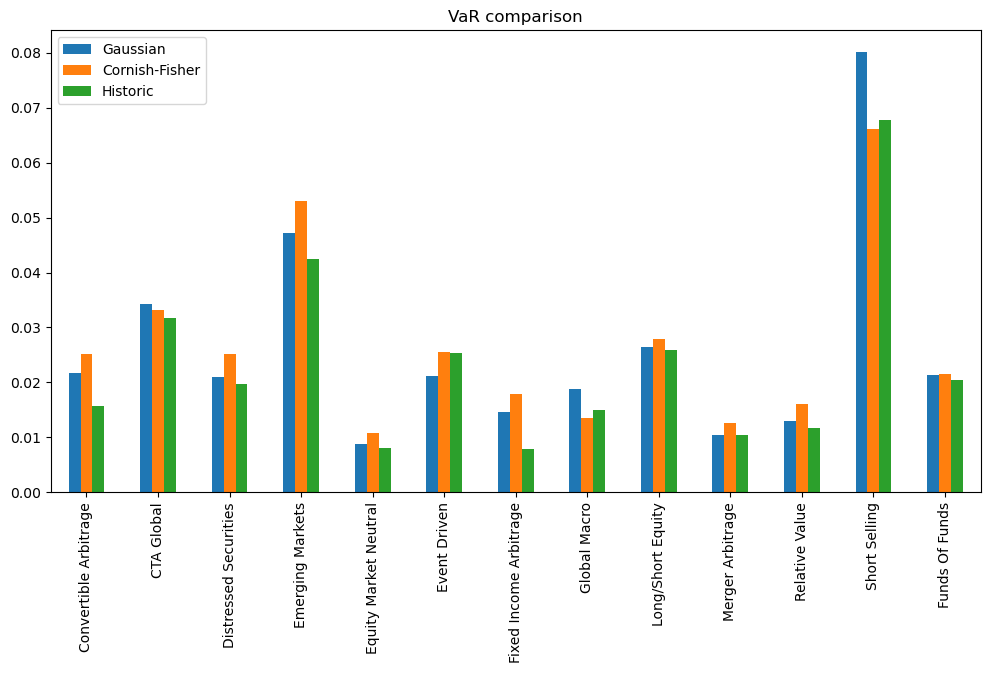

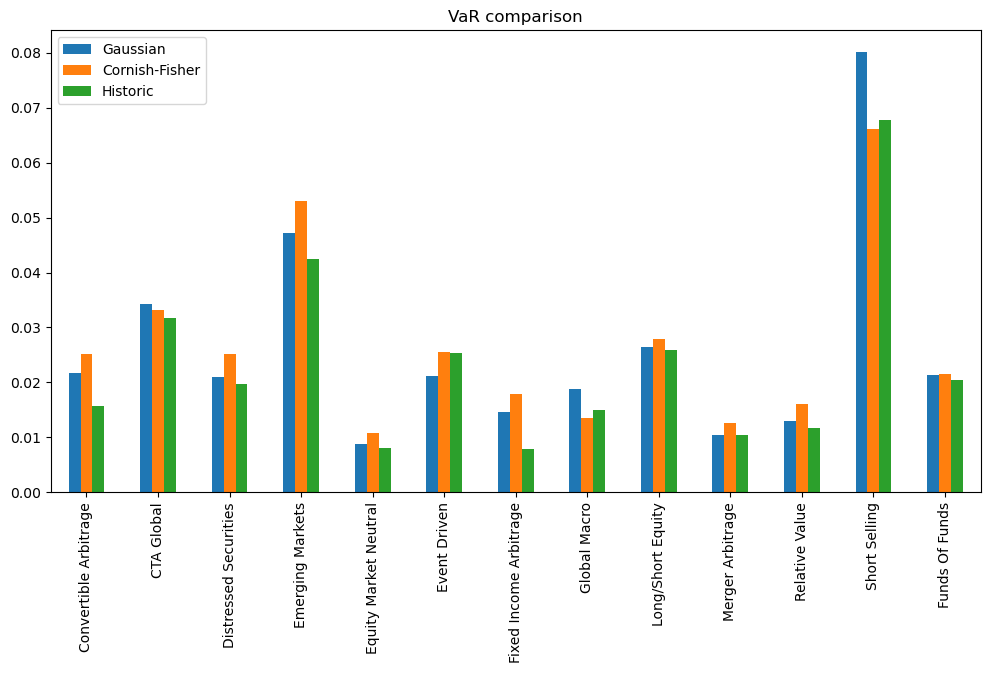

In [47]:
mm.compare_var_estimates(hfi)

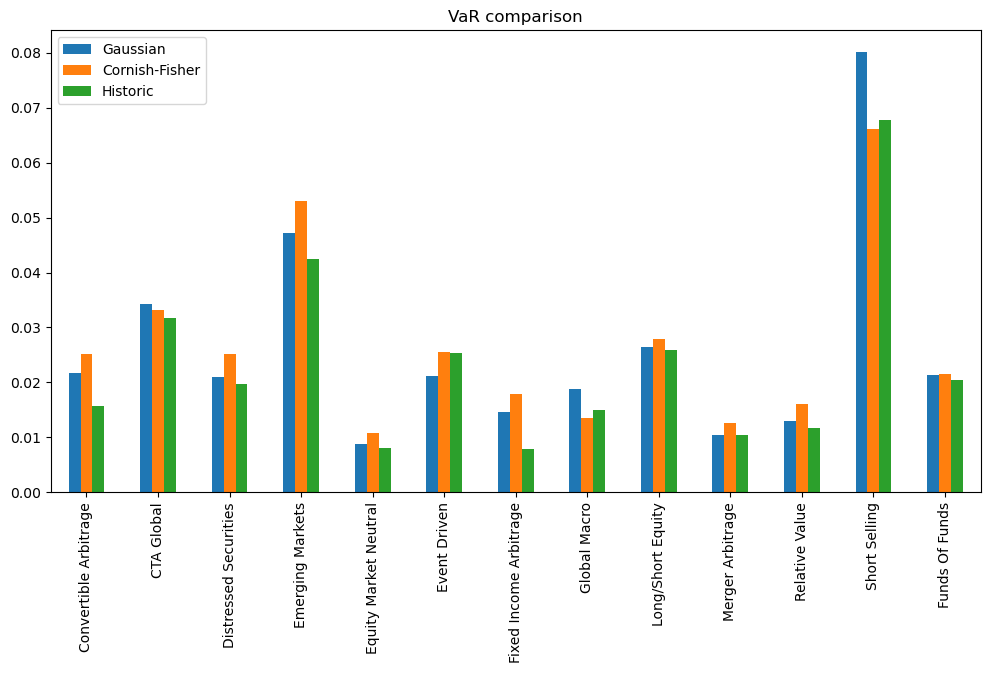

In [48]:
mm.compare_var_estimates(hfi)

In [49]:
mm.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64